# Semi supervised learning

In [15]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt

from weights import NearestNeighbors, KernelComputer, KernelRegressor
np.random.seed(0)

The following command are using LaTeX backend to produce Type 1 font in PDF produced by matplotlib (it produces Type 3 otherwise). You can uncomment those lines.

In [16]:
%matplotlib inline
plt.rcParams['text.latex.preamble'] = [r'\usepackage{newtxmath}'] 
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
plt.rc('text', usetex=True)

## Real Simulation

In [17]:
nb = 2000

def get_trainset(nb, verbose=True):
    theta = 2 * np.pi * np.random.rand(nb)
    cluster = np.random.choice(4, nb) + 1
    x = cluster * np.cos(theta)
    y = cluster * np.sin(theta)
    y1 = 2
    x1 = -2*np.sqrt(3)
    x2 = 1
    y2 = -2*np.sqrt(2)
    y3 = -1
    x3 = -np.sqrt(3)
    x4 = -1
    y4 = 0
    x_train = np.vstack((np.hstack((x1, x2, x3, x4, x)), np.hstack((y1, y2, y3, y4, y)))).T
    s_train = np.zeros(x_train.shape[0])
    s_train[0] = -1
    s_train[1] = +1
    s_train[2] = -1
    s_train[3] = +1
    return x_train, s_train

x_train, s_train = get_trainset(nb)

In [18]:
def get_x_test(num):
    x = np.linspace(-4.5, 4.5, num)
    X, Y = np.meshgrid(x, x)
    x_test = np.vstack((X.reshape(-1), Y.reshape(-1))).T
    return x_test, X, Y

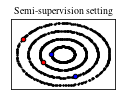

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.5)) 
a = ax.scatter(x_train[4:, 0], x_train[4:, 1], color='k', s=1, zorder=2)
b = ax.scatter(x_train[0, 0], x_train[0, 1], color='r', s=20, edgecolor='k', zorder=2)
c = ax.scatter(x_train[1, 0], x_train[1, 1], color='b', s=20, edgecolor='k', zorder=2)
d = ax.scatter(x_train[2, 0], x_train[2, 1], color='r', s=20, edgecolor='k', zorder=2)
e = ax.scatter(x_train[3, 0], x_train[3, 1], color='b', s=20, edgecolor='k', zorder=2)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
# ax.legend([a, c], ['unlabelled data', 'labelled data'], loc='upper right', prop={'size': 8}, ncol=1) 
ax.tick_params(axis='both', which='major', labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Semi-supervision setting', size=10)
plt.tight_layout()
fig.savefig('savings/setting.pdf')    

## With kernel methods without Laplacian

#### Big regularization

In [20]:
num = 100
x_test, X, Y = get_x_test(num)

In [26]:
sigma = 5e-1
lambd = 1 * nb
kernel_internal = KernelComputer('Gaussian', sigma=sigma)
kernel = KernelRegressor(kernel_internal)
kernel.set_support(x_train)

In [27]:
kernel.update_sigma(sigma)
kernel.update_lambda(lambd)

In [28]:
alpha = kernel(x_test)
Z = alpha @ s_train

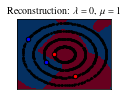

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.5)) 
# ax.pcolor(X, Y, Z.reshape((num, num)) / np.max(np.abs(Z)), cmap="RdBu_r", vmin=-1, vmax=1)
ax.pcolor(X, Y, np.sign(Z.reshape((num, num))), cmap="RdBu_r", vmin=-1, vmax=1)
ax.scatter(x_train[4:, 0], x_train[4:, 1], color='k', s=1, zorder=2)
ax.scatter(x_train[0, 0], x_train[0, 1], color='b', s=20, edgecolor='k', zorder=2)
ax.scatter(x_train[1, 0], x_train[1, 1], color='r', s=20, edgecolor='k', zorder=2)
ax.scatter(x_train[2, 0], x_train[2, 1], color='b', s=20, edgecolor='k', zorder=2)
ax.scatter(x_train[3, 0], x_train[3, 1], color='r', s=20, edgecolor='k', zorder=2)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
ax.tick_params(axis='both', which='major', labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Reconstruction: $\lambda=0,\ \mu=1$', size=10)
plt.tight_layout()
fig.savefig('savings/krr_1.pdf')    

# Add a color bar which maps values to colors.


#### Small regularization

In [30]:
lambd = 0
kernel.update_lambda(lambd)
alpha = kernel(x_test)
Z = alpha @ s_train

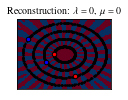

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.5)) 
# ax.pcolor(X, Y, Z.reshape((num, num)) / np.max(np.abs(Z)), cmap="RdBu_r", vmin=-1, vmax=1)
ax.pcolor(X, Y, np.sign(Z.reshape((num, num))), cmap="RdBu_r", vmin=-1, vmax=1)
ax.scatter(x_train[4:, 0], x_train[4:, 1], color='k', s=1, zorder=2)
ax.scatter(x_train[0, 0], x_train[0, 1], color='b', s=20, edgecolor='k', zorder=2)
ax.scatter(x_train[1, 0], x_train[1, 1], color='r', s=20, edgecolor='k', zorder=2)
ax.scatter(x_train[2, 0], x_train[2, 1], color='b', s=20, edgecolor='k', zorder=2)
ax.scatter(x_train[3, 0], x_train[3, 1], color='r', s=20, edgecolor='k', zorder=2)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
ax.tick_params(axis='both', which='major', labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Reconstruction: $\lambda=0,\ \mu=0$', size=10)
plt.tight_layout()
fig.savefig('savings/krr_0.pdf')    

In [ ]:
y_train = np.zeros(s_train.shape, s_train.dtype)
for i in range(4):
    ind = y_pred == i
    y_train[:, i][ind] = 1

In [59]:
yp = np.argmax(alpha @ y_train, axis=1)

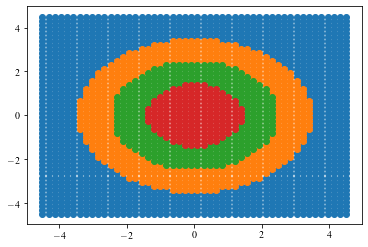

In [60]:
for i in range(4):
    ind = yp == i
    plt.scatter(x_test[ind, 0], x_test[ind, 1])

## With neighborhood diffusion

In [49]:
def graph_Laplacian_disambiguation(x_train, s_train, sigma=1e-1):
    W = 2 * x_train @ x_train.T
    norm = np.sum(x_train ** 2, axis=1)
    W -= norm[:, np.newaxis]
    W -= norm[np.newaxis, :]
    W /= sigma**2
    W = np.exp(W)

    W -= np.diag(np.sum(W, axis=1))
    W[:nb,:nb] *= -1

    alpha = np.linalg.solve(W[:nb,:nb], W[:nb, nb:])
    y_dis = s_train.copy()
    y_dis[:nb] = alpha @ s_train[nb:]
    y_pred = np.argmax(y_dis, axis=1)
    
    return y_pred

In [50]:
y_pred = graph_Laplacian_disambiguation(x_train, s_train)

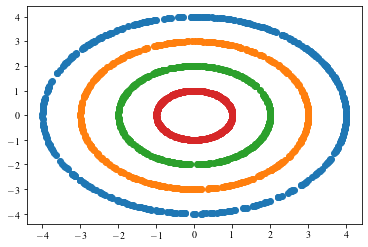

In [51]:
fig, ax = plt.subplots()
for i in range(4):
    ind = y_pred == i
    plt.scatter(x_train[ind, 0], x_train[ind, 1])